In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/train.csv', index_col='id')
test_df = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/test.csv', index_col='id')

In [4]:
train_df.head(10)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [6]:
stats = train_df.describe()
stats

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


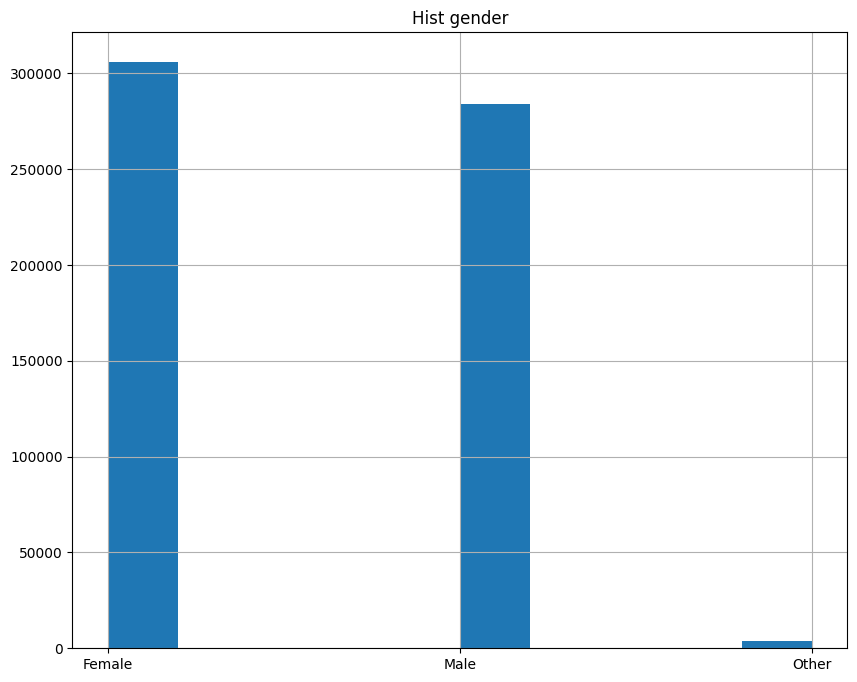

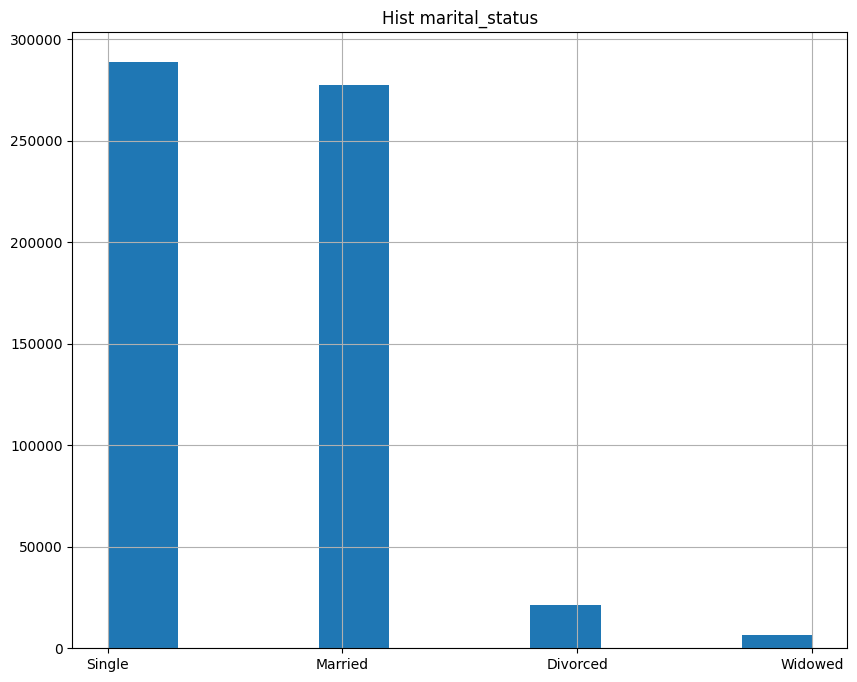

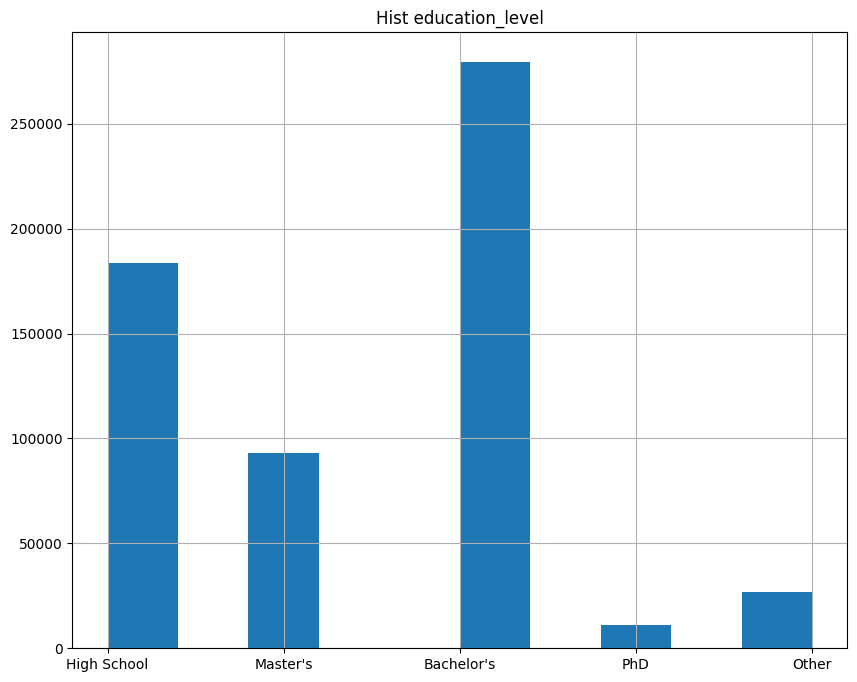

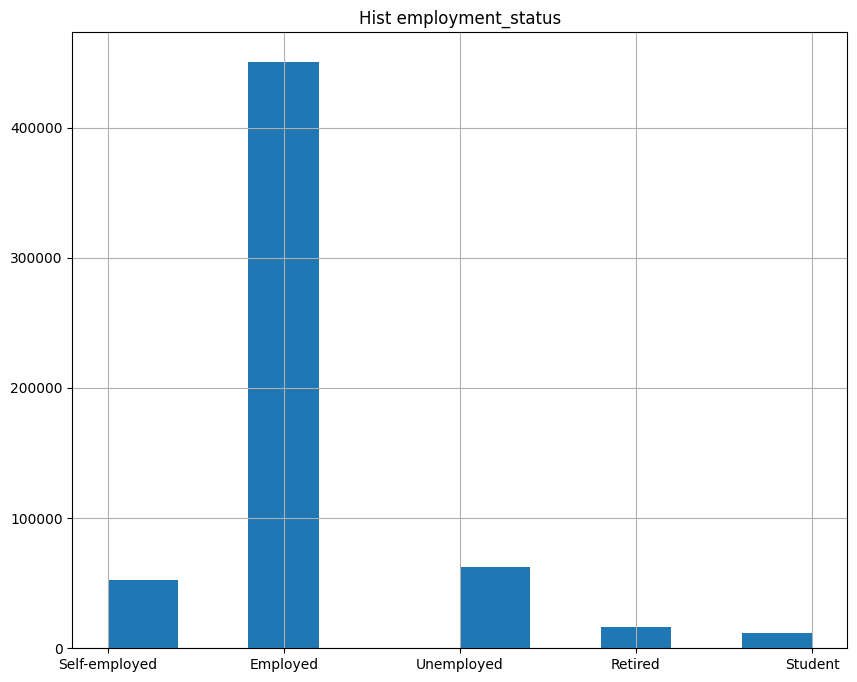

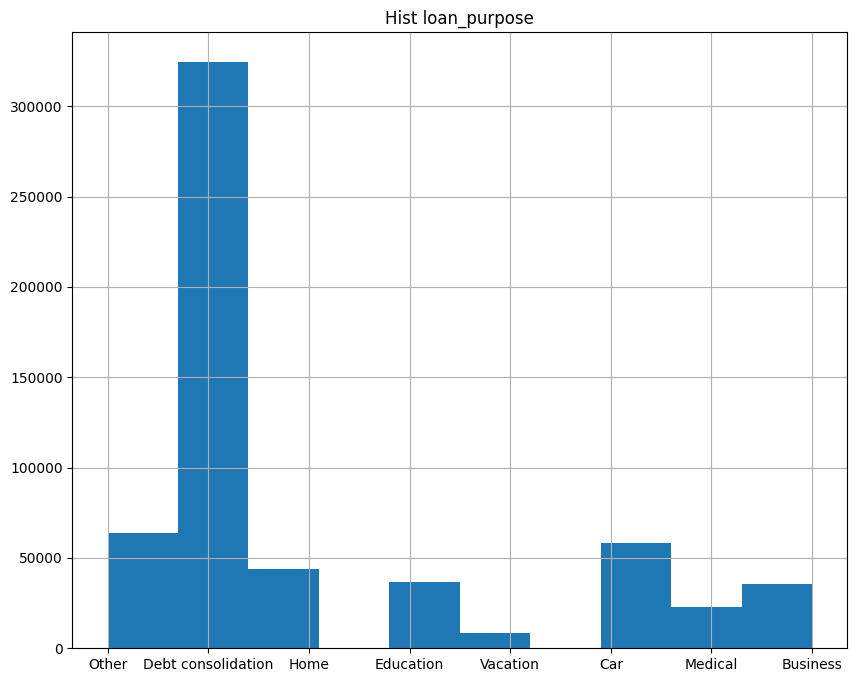

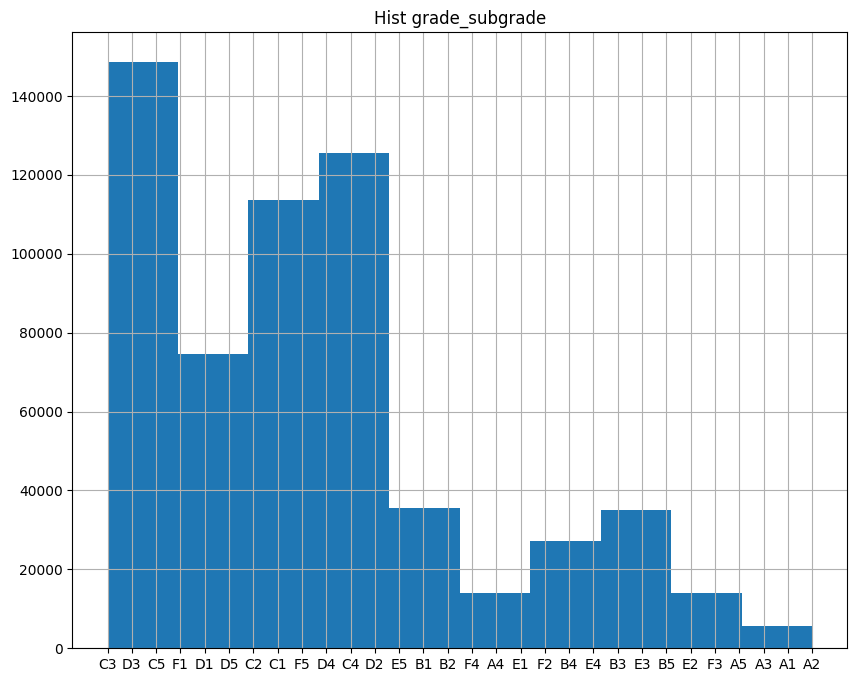

In [7]:
import matplotlib.pyplot as plt


obj_cols = train_df.select_dtypes(['object']).columns

def obj_plotting(feature, data=train_df):
  plt.figure(figsize=(10, 8))

  data[feature].hist()
  plt.title(f'Hist {feature}')


for col in obj_cols:
  obj_plotting(col)

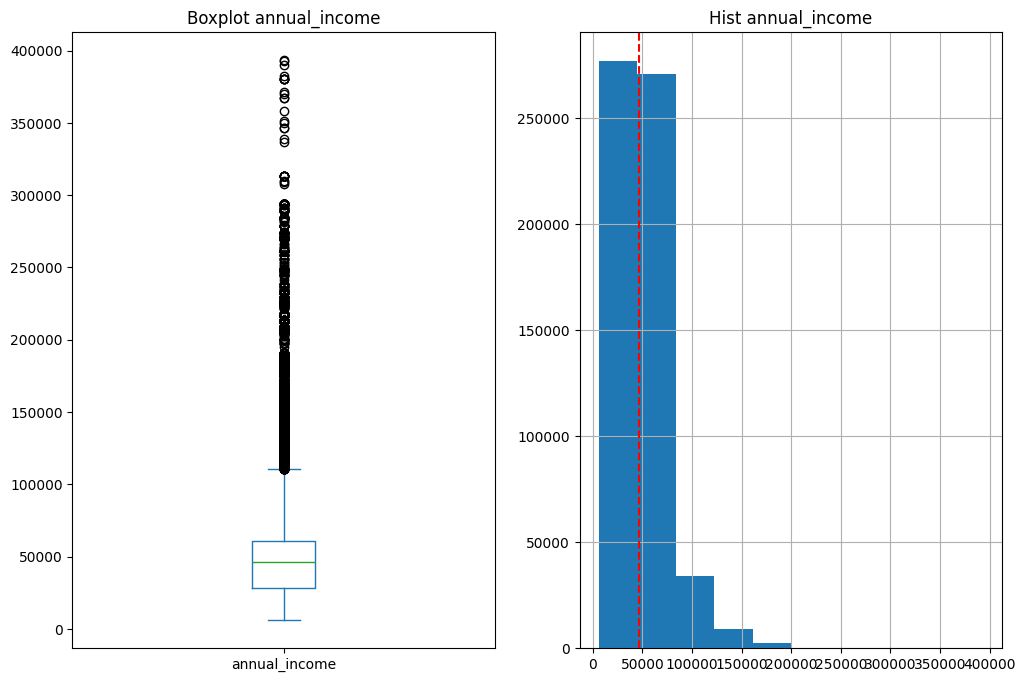

Медиана: 46557.68
Минимум: 6002.43
Максимум: 393381.74
Количество выбросов: 15917
Процент выбросов: 2.68%
Верхние выбросы: 110579.22
------------------------------




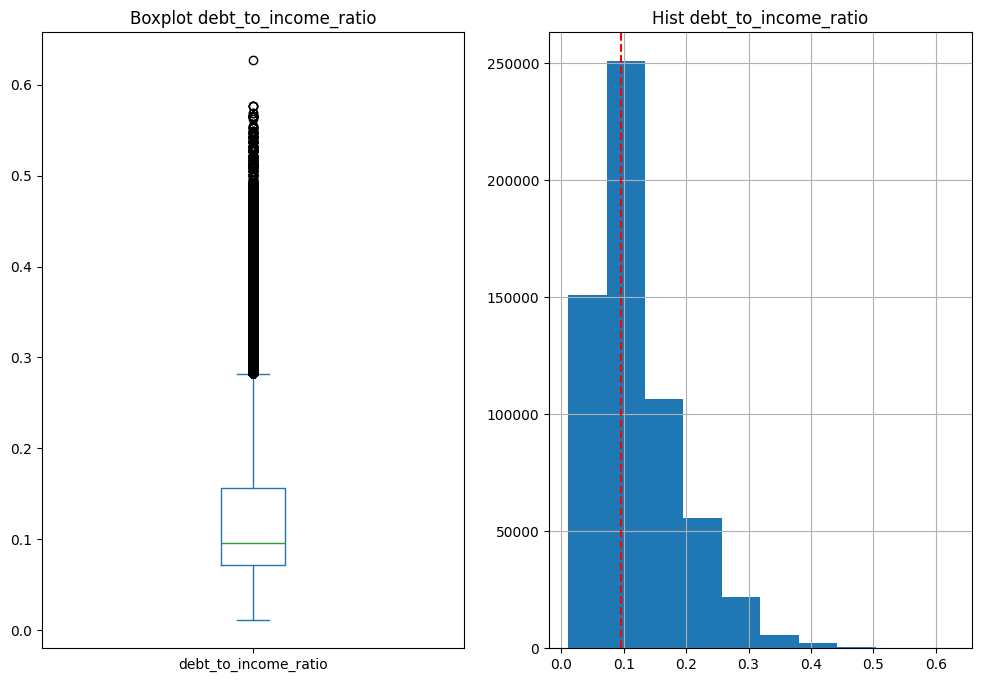

Медиана: 0.10
Минимум: 0.01
Максимум: 0.63
Количество выбросов: 17556
Процент выбросов: 2.96%
Верхние выбросы: 0.28
------------------------------




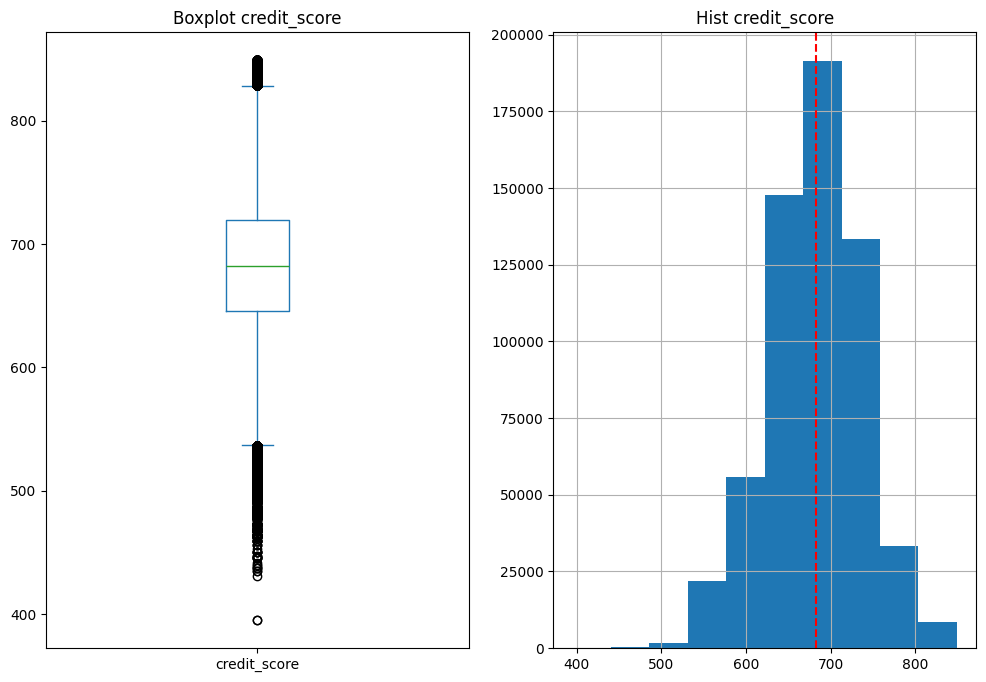

Медиана: 682.00
Минимум: 395.00
Максимум: 849.00
Количество выбросов: 5901
Процент выбросов: 0.99%
Нижние выбросы: 536.00
Верхние выбросы: 829.00
------------------------------




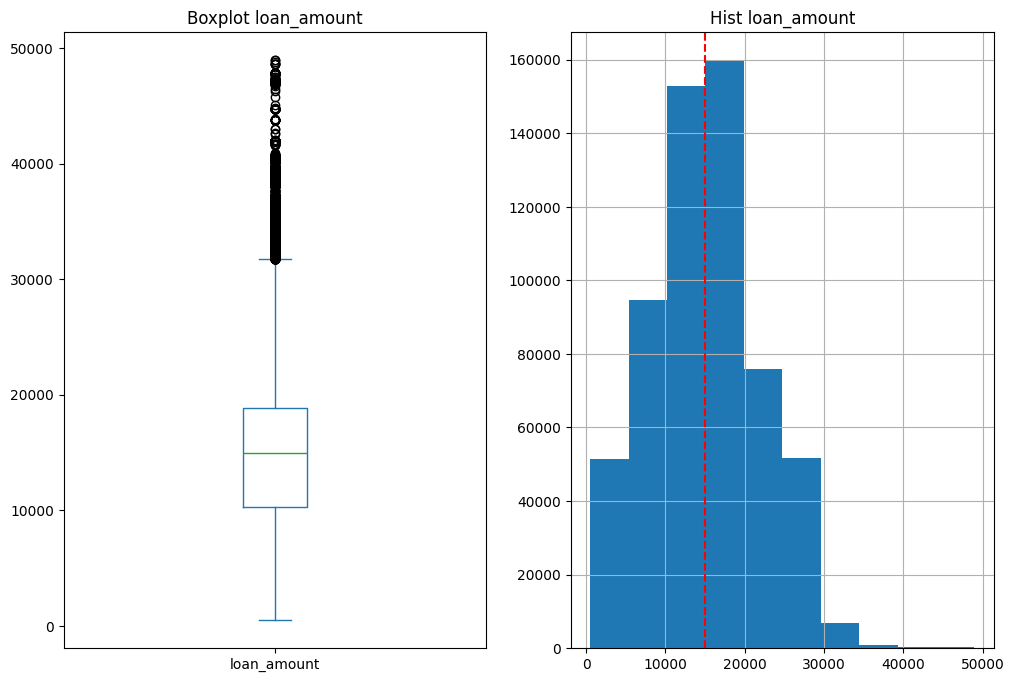

Медиана: 15000.22
Минимум: 500.09
Максимум: 48959.95
Количество выбросов: 2902
Процент выбросов: 0.49%
Верхние выбросы: 31741.58
------------------------------




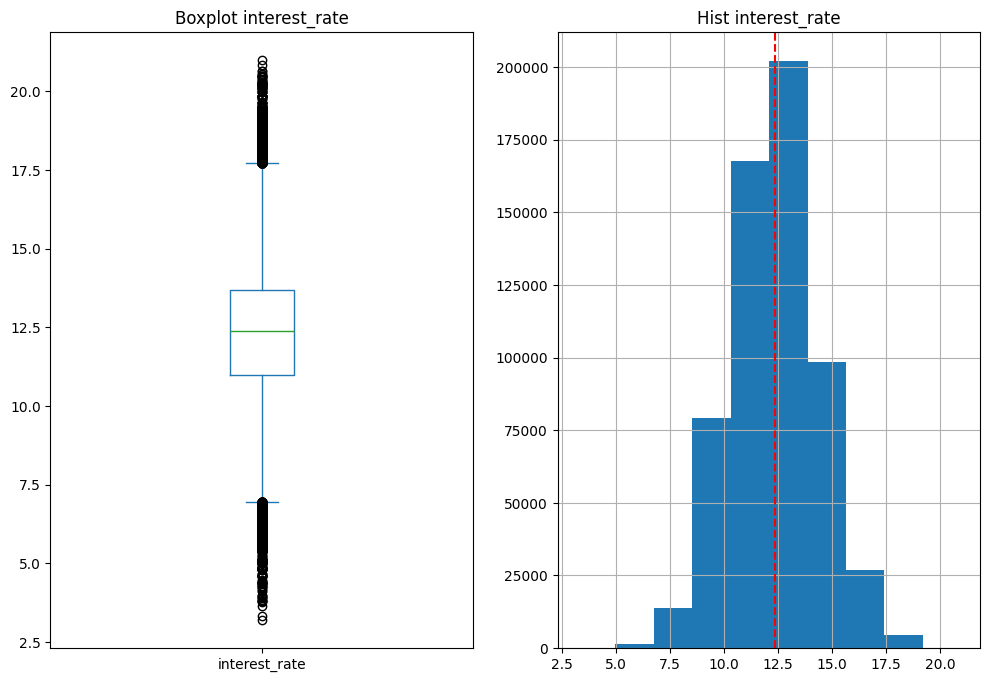

Медиана: 12.37
Минимум: 3.20
Максимум: 20.99
Количество выбросов: 5136
Процент выбросов: 0.86%
Нижние выбросы: 6.95
Верхние выбросы: 17.72
------------------------------




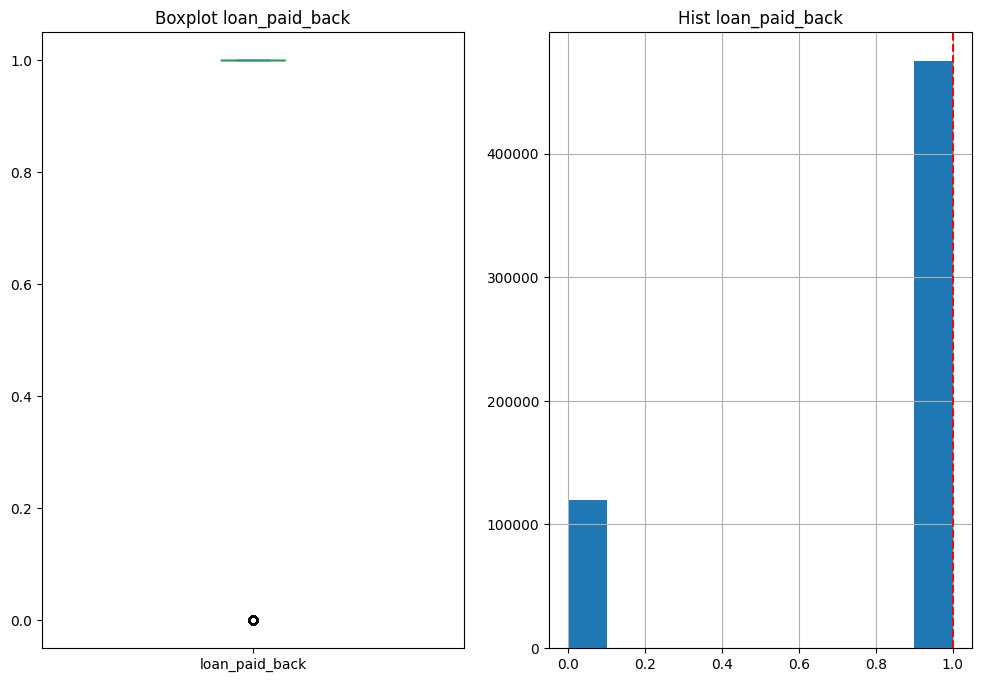

Медиана: 1.00
Минимум: 0.00
Максимум: 1.00
Количество выбросов: 119500
Процент выбросов: 20.12%
Нижние выбросы: 0.00
------------------------------




In [8]:
num_cols = train_df.select_dtypes(['float64','int64']).columns

def nums_plotting(feature, data=train_df):
  plt.figure(figsize=(12, 8))

  plt.subplot(1, 2, 1)
  data[feature].plot.box()
  plt.title(f'Boxplot {feature}')

  plt.subplot(1, 2, 2)
  data[feature].hist()
  plt.axvline(data[feature].median(), color='red', linestyle='--', label='Медиана')
  plt.title(f'Hist {feature}')

  stats = data[feature].describe()

  Q1 = stats['25%']
  Q3 = stats['75%']
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]

  plt.show()

  print(f"Медиана: {stats['50%']:.2f}")
  print(f"Минимум: {stats['min']:.2f}")
  print(f"Максимум: {stats['max']:.2f}")
  print(f"Количество выбросов: {len(outliers)}")
  print(f"Процент выбросов: {(len(outliers)/len(data[feature]))*100:.2f}%")
  if len(outliers) > 0:
    lower_outliers = data[feature][data[feature] < lower_bound]
    upper_outliers = data[feature][data[feature] > upper_bound]

    if len(lower_outliers) > 0:
        print(f"Нижние выбросы: {lower_outliers.max():.2f}")
    if len(upper_outliers) > 0:
        print(f"Верхние выбросы: {upper_outliers.min():.2f}")
  print("-" * 30)
  print('\n')

for col in num_cols:
  nums_plotting(col)

In [9]:
# Варианты для решения дисбаланса:
# * SMOTE / SVMSMOTE
# * Взвешивание классов

# Варианты для решения проблемы выбросов:
# * Лог трансформация
# * Ничего не делать

# Варианты моделей:
# * Random Forest (Balanced)
# * CatBoost
# * Нейронка (sigmoid/)

<Axes: >

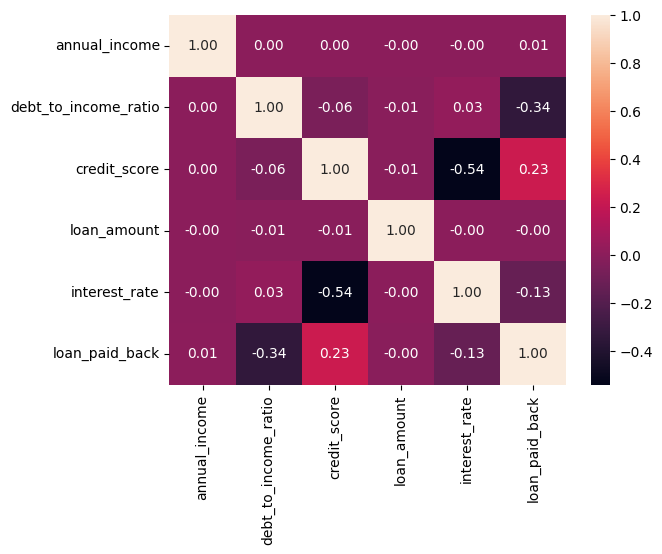

In [10]:
# Матрица корреляций
import seaborn as sns

corr = train_df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [21]:
# Предобработка
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

def preprocessing(
    df,
    target_col: str,
    log_cols=None,
    label_cols=None,
    onehot_cols=None,
    smote: bool = False,
    test_size: float = 0.2,
    random_state: int = 42,
):
  label_encoders = {}
  onehot_encoder = None
  scaler = None

  df = df.copy()

  # ----------------- 0. Split raw data -----------------
  y = df[target_col].values
  X = df.drop(columns=[target_col])

  X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    stratify=y,
    random_state=random_state
  )

  print(f'Split done\n')

  # ----------------- 1. Log-transform -----------------
  if log_cols != None:
    for col in log_cols:
      min_val = X_train[col].min()
      shift = 1 - min_val if min_val <= 0 else 1
      X_train[col] = np.log(X_train[col] + shift)
      X_val[col] = np.log(X_val[col] + shift)

    print(f'Log-transform done\n')

  # ----------------- 2. Label Encoding -----------------
  if label_cols:
    for col in label_cols:
      le = LabelEncoder()
      X_train[col] = le.fit_transform(X_train[col].astype(str))
      X_val[col] = le.transform(X_val[col].astype(str))
      label_encoders[col] = le

    print(f'Label Encoding done\n')

  # ----------------- 3. One-Hot Encoding -----------------
  if onehot_cols:
    onehot_encoder = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False)

    train_ohe = onehot_encoder.fit_transform(X_train[onehot_cols])
    val_ohe   = onehot_encoder.transform(X_val[onehot_cols])

    ohe_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)

    train_ohe_df = pd.DataFrame(
        train_ohe,
        columns=ohe_feature_names,
        index=X_train.index
    )

    val_ohe_df = pd.DataFrame(
        val_ohe,
        columns=ohe_feature_names,
        index=X_val.index
    )

    X_train = X_train.drop(columns=onehot_cols)
    X_val   = X_val.drop(columns=onehot_cols)

    X_train = pd.concat([X_train, train_ohe_df], axis=1)
    X_val   = pd.concat([X_val, val_ohe_df], axis=1)

    print(f'One-Hot Encoding done\n')

  # ----------------- 4. SMOTE (train only) -----------------
  if smote:
    sm = SMOTE(random_state=random_state)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    print(f'SMOTE done\n')

  # ----------------- 5. StandardScaler -----------------
  num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
  scaler = StandardScaler()
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
  X_val[num_cols]   = scaler.transform(X_val[num_cols])

  print(f'StandardScaler done\n')

  # ----------------- 6. Return -----------------
  transformers = {
      "scaler": scaler,
      "label_encoders": label_encoders,
      "onehot_encoder": onehot_encoder,
      "log_cols": log_cols,
      "label_cols": label_cols,
      "onehot_cols": onehot_cols,
  }

  print(f'Return done\n')
  print(f'Preprocessing ends\n\n\n')

  return X_train, y_train, X_val, y_val, transformers

In [24]:
target_col = 'loan_paid_back'

obj_cols = list(obj_cols)
num_cols = list(train_df.select_dtypes(['float64','int64']).columns)
num_cols.pop(-1)
ohe_cols = [col for col in obj_cols if train_df[col].nunique() <= 4]
le_cols  = [col for col in obj_cols if train_df[col].nunique() > 4]

print(num_cols, '\n', ohe_cols, '\n', le_cols)

['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate'] 
 ['gender', 'marital_status'] 
 ['education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


In [25]:
# RF
X_train_smote_log_ohe, y_train_smote_log_ohe, X_val_smote_log_ohe, y_val_smote_log_ohe, transformers_smote_log_ohe = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=le_cols, onehot_cols=ohe_cols, smote=True)
X_train_smote_ohe, y_train_smote_ohe, X_val_smote_ohe, y_val_smote_ohe, transformers_smote_ohe = preprocessing(train_df, target_col, label_cols=le_cols, onehot_cols=ohe_cols, smote=True)

# RFBalanced
X_train_log_ohe, y_train_log_ohe, X_val_log_ohe, y_val_log_ohe, transformers_log_ohe = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=le_cols, onehot_cols=ohe_cols)
X_train_ohe, y_train_ohe, X_val_ohe, y_val_ohe, transformers_ohe = preprocessing(train_df, target_col, label_cols=le_cols, onehot_cols=ohe_cols)

# CatBoost
X_train_smote_log, y_train_smote_log, X_val_smote_log, y_val_smote_log, transformers_smote_log = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=obj_cols, smote=True)
X_train_smote, y_train_smote, X_val_smote, y_val_smote, transformers_smote = preprocessing(train_df, target_col, label_cols=obj_cols, smote=True)

# CatBoostBalanced
X_train_log, y_train_log, X_val_log, y_val_log, transformers_log = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=obj_cols)
X_train, y_train, X_val, y_val, transformers = preprocessing(train_df, target_col, label_cols=obj_cols)

Split done

Log-transform done

Label Encoding done

One-Hot Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

One-Hot Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

One-Hot Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

One-Hot Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

StandardScaler done

Return done

Preprocessing ends





In [26]:
import joblib

# RF with One-Hot Encoding
# smote_log_RF
joblib.dump(
    {
        "X_train": X_train_smote_log_ohe,
        "y_train": y_train_smote_log_ohe,
        "X_val": X_val_smote_log_ohe,
        "y_val": y_val_smote_log_ohe,
        "transformers": transformers_smote_log_ohe,
    },
    "RF_smote_log.joblib"
)

# smote_RF
joblib.dump(
    {
        "X_train": X_train_smote_ohe,
        "y_train": y_train_smote_ohe,
        "X_val": X_val_smote_ohe,
        "y_val": y_val_smote_ohe,
        "transformers": transformers_smote_ohe,
    },
    "RF_smote.joblib"
)

# log_RF
joblib.dump(
    {
        "X_train": X_train_log_ohe,
        "y_train": y_train_log_ohe,
        "X_val": X_val_log_ohe,
        "y_val": y_val_log_ohe,
        "transformers": transformers_log_ohe,
    },
    "RF_log.joblib"
)

# RF
joblib.dump(
    {
        "X_train": X_train_ohe,
        "y_train": y_train_ohe,
        "X_val": X_val_ohe,
        "y_val": y_val_ohe,
        "transformers": transformers_ohe,
    },
    "RF.joblib"
)

#________________________________________________________

# CatBoost only with Label Encoding
# smote_log_CatBoost
joblib.dump(
    {
        "X_train": X_train_smote_log,
        "y_train": y_train_smote_log,
        "X_val": X_val_smote_log,
        "y_val": y_val_smote_log,
        "transformers": transformers_smote_log,
    },
    "CB_smote_log.joblib"
)

# smote_CatBoost
joblib.dump(
    {
        "X_train": X_train_smote,
        "y_train": y_train_smote,
        "X_val": X_val_smote,
        "y_val": y_val_smote,
        "transformers": transformers_smote,
    },
    "CB_smote.joblib"
)

# log_CatBoost
joblib.dump(
    {
        "X_train": X_train_log,
        "y_train": y_train_log,
        "X_val": X_val_log,
        "y_val": y_val_log,
        "transformers": transformers_log,
    },
    "CB_log.joblib"
)

# CatBoost
joblib.dump(
    {
        "X_train": X_train,
        "y_train": y_train,
        "X_val": X_val,
        "y_val": y_val,
        "transformers": transformers,
    },
    "CB.joblib"
)

['CB.joblib']